In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.special import kl_div

In [95]:
### Functions

def comparing_hist_plot(s1, s2, name1=s1.name, name2=s2.name):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
    
    # So I can call them whatever I want
    s1.name = name1
    s2.name = name2
    
    sns.histplot(x=s1, ax=ax1) ## For some reason distplot doesn't work!!
    sns.histplot(x=s2, ax=ax2)
    plt.show()

def get_outliers_index(serie, threshold=1.5):
    
    ## find interquartile range
    q1 = np.percentile(serie, 25)
    q3 = np.percentile(serie, 75)
    iqr = q1-3
    
    condition_1  = serie < (q1 - (iqr * threshold))
    condition_2 = serie > (q3 + (iqr * threshold))
    
    serie[condition_1 | condition_2]
    ## It is | because the series will return true either the value
    ## is smaller than ... or bigger than
    
    result = serie[condition_1 | condition_2].index
    ## I just like having the index.
    
    return result

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [96]:
! ls files_for_lab/

we_fn_use_c_marketing_customer_value_analysis.csv


In [97]:
path = 'files_for_lab/'
file_name = 'we_fn_use_c_marketing_customer_value_analysis.csv'
data = pd.read_csv(path + file_name)

In [98]:
numerical = data.select_dtypes(include=np.number)
numerical.columns = [i.lower().replace(' ','_') for i in numerical.columns]

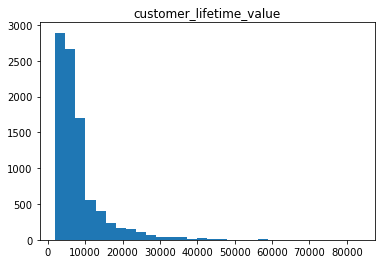

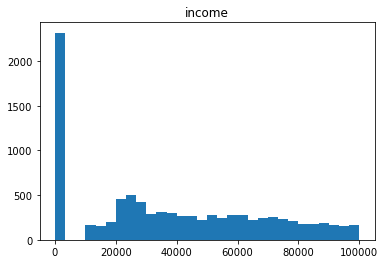

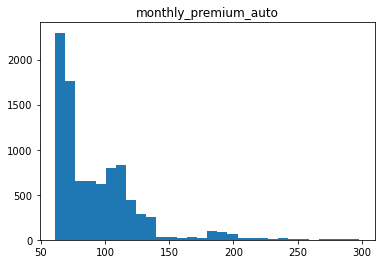

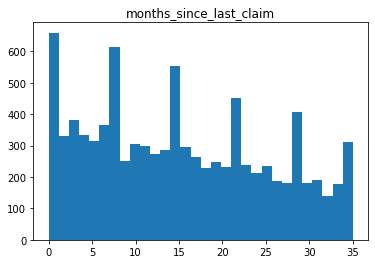

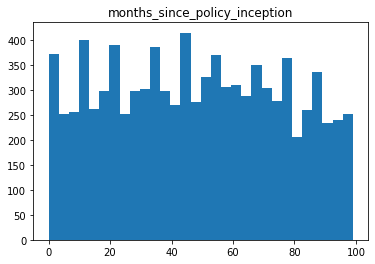

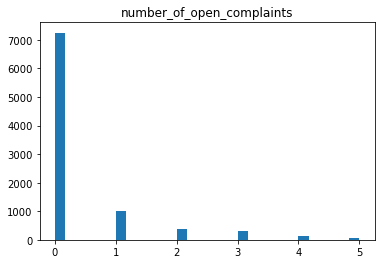

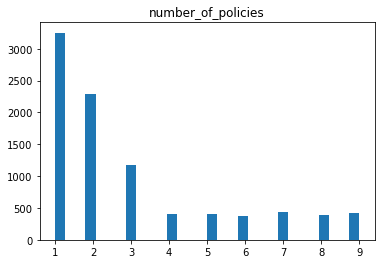

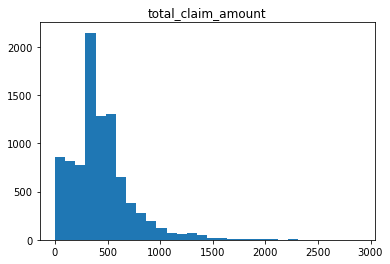

In [99]:
for column_name in numerical.columns:
    plt.title(label=column_name)
    fig = plt.hist(numerical[column_name], bins=30)
    plt.show()

In [100]:
## The following columns are being drop either because their values are not continuous
## Or because they display a random(-ish) distribution.
drop_columns = ['months_since_last_claim', 'months_since_policy_inception',
               'number_of_open_complaints', 'number_of_policies']
continuous_numerical = numerical.drop(drop_columns, axis=1)

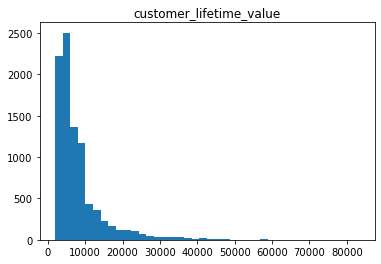

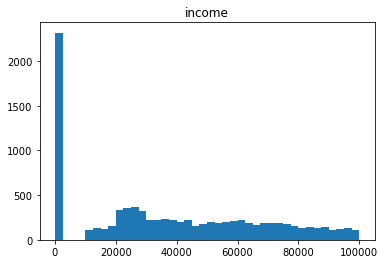

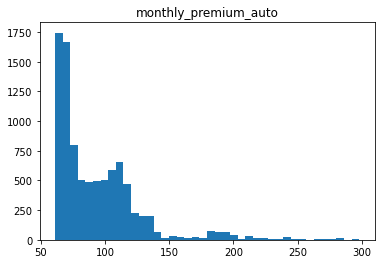

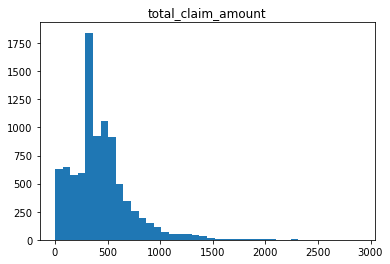

In [101]:
for column_name in continuous_numerical.columns:
    plt.title(label=column_name)
    fig = plt.hist(numerical[column_name], bins=40)
    plt.show()

In [102]:
data = continuous_numerical

kl_div(data.customer_lifetime_value, data.customer_lifetime_value).sum()

0.0

In [103]:
## customer_lifetime_value looks like an exponential 

In [104]:
data = data.drop('customer_lifetime_value', axis=1)

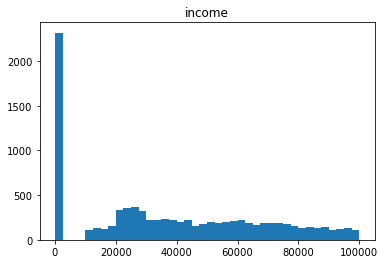

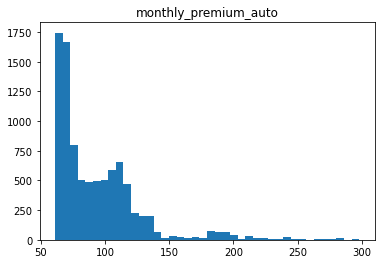

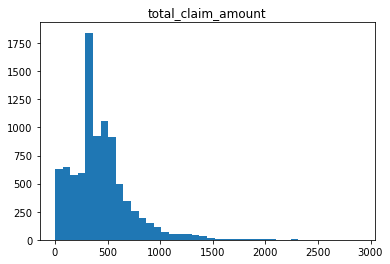

In [105]:
for column_name in data.columns:
    plt.title(label=column_name)
    fig = plt.hist(data[column_name], bins=40)
    plt.show()

### Transforming the data

#### Method 1: Apply a logaritmic transformation

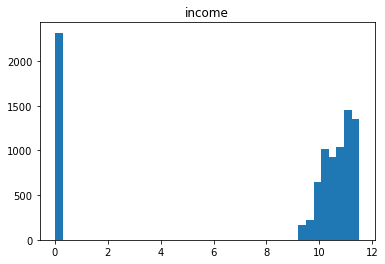

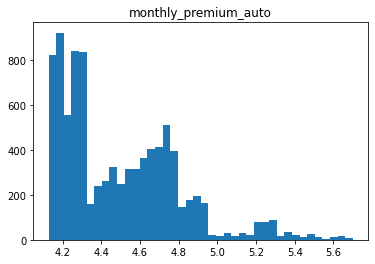

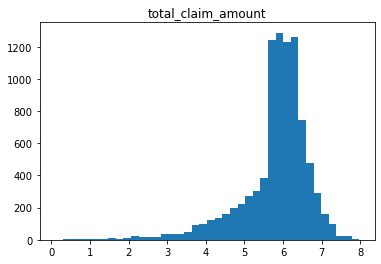

In [106]:
for column_name in data.columns:
    plt.title(label=column_name)
    fig = plt.hist(np.log1p(data[column_name]), bins=40)
    plt.show()

In [107]:
## So a log transformation doesn't help.

#### Method 2: Replace the outliers with the mean.

In [108]:
get_outliers_index(data.monthly_premium_auto)

Int64Index([  31,  181,  196,  248,  292,  404,  425,  496,  510,  633,
            ...
            8470, 8479, 8567, 8662, 8734, 8853, 8911, 8943, 9026, 9049],
           dtype='int64', length=151)

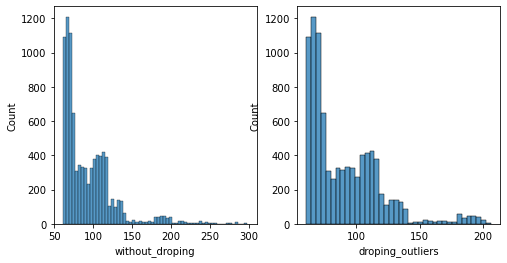

In [109]:
## Monthly premium auto
s1 = data.monthly_premium_auto
s2 = s1.drop(get_outliers_index(s1))
comparing_hist_plot(s1,s2,'without_droping','droping_outliers')

In [110]:
data.columns

Index(['income', 'monthly_premium_auto', 'total_claim_amount'], dtype='object')

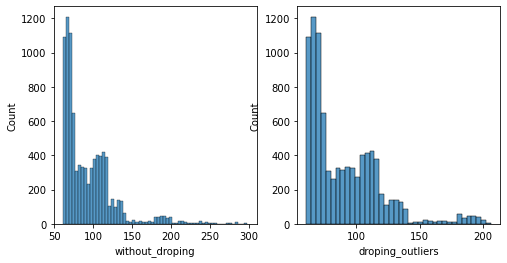

In [111]:
## Monthly premium auto
s1 = data.monthly_premium_auto
s2 = s1.drop(get_outliers_index(s1))
comparing_hist_plot(s1,s2,'without_droping','droping_outliers')

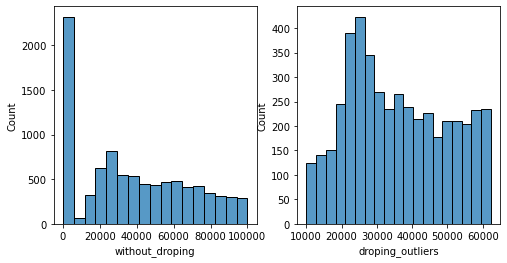

In [112]:
## Income
s1 = data.income
s2 = s1.drop(get_outliers_index(s1))
comparing_hist_plot(s1,s2,'without_droping','droping_outliers')

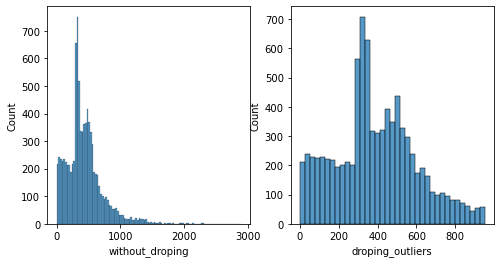

In [113]:
## Total Claim Amount
s1 = data.total_claim_amount
s2 = s1.drop(get_outliers_index(s1))
comparing_hist_plot(s1,s2,'without_droping','droping_outliers')

#### Method 3:

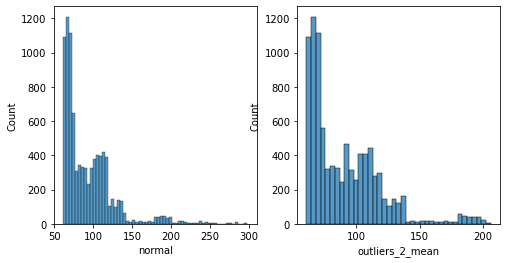

In [148]:
s1 = data.monthly_premium_auto
s2 = s1.copy(deep=True)
s2[get_outliers_index(s2)] = s1.mean()
s2 = s2.astype('float')
comparing_hist_plot(s1,s2,'normal','outliers_2_mean')

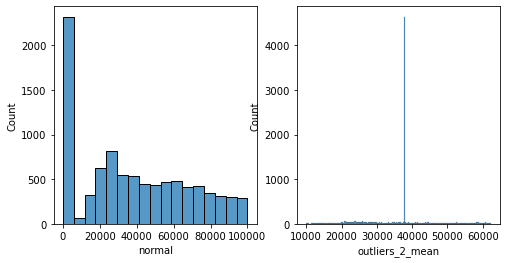

In [149]:
s1 = data.income
s2 = s1.copy(deep=True)
s2[get_outliers_index(s2)] = s1.mean()
s2 = s2.astype('float')
comparing_hist_plot(s1,s2,'normal','outliers_2_mean')

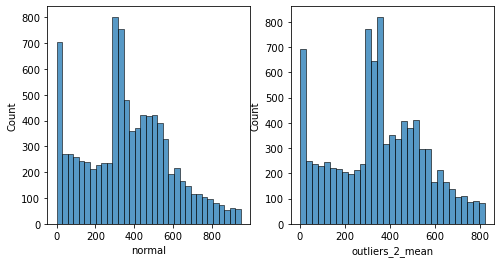

In [150]:
s1 = data.total_claim_amount
s2 = s1.copy(deep=True)
s2[get_outliers_index(s2)] = s1.mean()
s2 = s2.astype('float')
comparing_hist_plot(s1,s2,'normal','outliers_2_mean')